# Client subscription of term deposit (y/n)

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/drive/MyDrive/Colab/Dataset/LogisticRegression/bank-full - Copy.csv')
df.head(7)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,6,7,8,10,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217.0,1.0,-1.0,0.0,unknown,no


In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
df.shape

(45211, 17)

In [28]:
# removing rows with atleast one null value
df = df.dropna()
df.shape

(624, 17)

In [29]:
# removing duplicates
df = df.drop_duplicates()
df.shape

(624, 17)

In [30]:
df.corr()

,balance,day,duration,campaign,pdays,previous
balance,1.000000,0.043111,0.172625,0.004189,NaN,NaN
day,0.043111,1.000000,-0.040668,-0.116508,NaN,NaN
duration,0.172625,-0.040668,1.000000,-0.019881,NaN,NaN
campaign,0.004189,-0.116508,-0.019881,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        624 non-null    object 
 1   job        624 non-null    object 
 2   marital    624 non-null    object 
 3   education  624 non-null    object 
 4   default    624 non-null    object 
 5   balance    624 non-null    float64
 6   housing    624 non-null    object 
 7   loan       624 non-null    object 
 8   contact    624 non-null    object 
 9   day        624 non-null    float64
 10  month      624 non-null    object 
 11  duration   624 non-null    float64
 12  campaign   624 non-null    float64
 13  pdays      624 non-null    float64
 14  previous   624 non-null    float64
 15  poutcome   624 non-null    object 
 16  y          624 non-null    object 
dtypes: float64(6), object(11)
memory usage: 87.8+ KB


## One hot encoding

In [31]:
# One-Hot Encoding of categrical variables
data1 = pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_unknown,poutcome_unknown,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,40,no,-5.0,yes,no,6.0,78.0,2.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1
620,48,no,147.0,no,no,6.0,142.0,3.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1
621,33,no,7.0,yes,yes,6.0,87.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1
622,40,no,109.0,yes,no,6.0,147.0,2.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1


In [37]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_unknown,poutcome_unknown,month_may
0,58,0,2143.0,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1
1,44,0,29.0,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1
2,33,0,2.0,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1
3,47,0,1506.0,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1
4,33,0,1.0,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,40,0,-5.0,1,0,6.0,78.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1
620,48,0,147.0,0,0,6.0,142.0,3.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1
621,33,0,7.0,1,1,6.0,87.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,1
622,40,0,109.0,1,0,6.0,147.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1


## Model building

In [38]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

## Fitting a model

In [39]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Model prediction

In [40]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
619,0,0
620,0,0
621,0,0
622,0,0


## Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[607,   4],
       [ 10,   3]])

In [44]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(607+3)/(607+4+10+3)

0.9775641025641025

## Classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       611
           1       0.43      0.23      0.30        13

    accuracy                           0.98       624
   macro avg       0.71      0.61      0.64       624
weighted avg       0.97      0.98      0.97       624



## ROC curve

Text(0, 0.5, 'True Positive Rate')

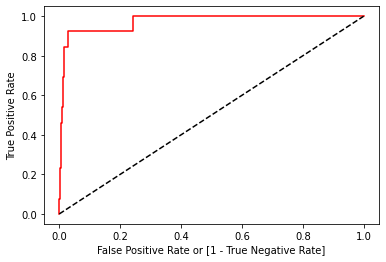

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

# auc score calculation
auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [48]:
# auc accuracy
auc

0.6121112929623569